# Conjunto BB1
Este conjunto de datos posee la misma señal que el conjunto R&D, pero con un 0,08 % de señal. La diferencia principal se encuentra en las masas de las partículas $Z'$, $X$ y $Y$, que para este conjunto son 3,823 TeV, 732 GeV y 378 GeV, respectivamente. 

In [2]:
# Importamos las librerías principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from myst_nb import glue

# Funciones de benchtools
from benchtools.src.plotools import bkg_sig_hist, bkg_sig_scatter
from benchtools.src.clustering import build_features

In [3]:
# Pre-procesando datos
path_data = "../../../datos/events_LHCO2020_BlackBox1.h5"
path_key = "../../../datos/events_LHCO2020_BlackBox1.masterkey"
build_features(path_data=path_data, nbatch=2, outname='BB1-100000', path_label=path_key, outdir='../../../datos/', chunksize=50000)

Part 1/2


100%|██████████| 50000/50000 [12:50<00:00, 64.93it/s]


Part 2/2


100%|██████████| 50000/50000 [11:48<00:00, 70.54it/s]


Done
Merging files


In [4]:
df = pd.read_csv("../../../datos/BB1-100000.csv")

# Calculamos la proporción de señal
df_sig = df[df.iloc[:,-1]==1]    # Última columna es señal
ratio_sig = df_sig.shape[0]*100/df.shape[0]
# Guardamos el valor en el notebook
glue("BB1-ratio", ratio_sig, display=False)

Para analizar este conjunto de datos, también utilizamos una fracción de los datos. 100,000 eventos, con {glue:text}`BB1-ratio:.2f`% de señal, que es una buena representación del conjunto completo.
## Datos pre-procesados
Las distribuciones de las variables presentan las mismas características que el conjunto R&D. Sin embargo, es más complicado observar la distribución para los eventos de señal por el poco porcentaje en el conjunto.

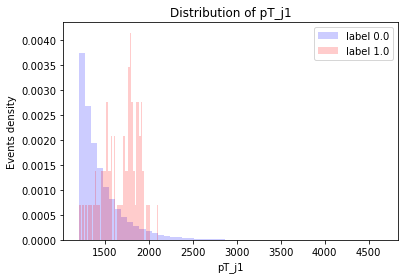

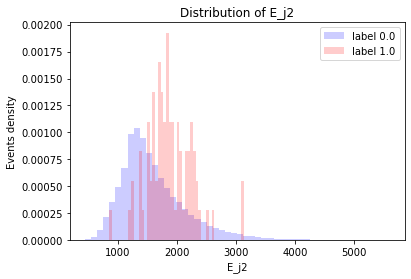

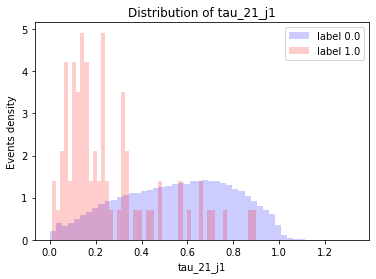

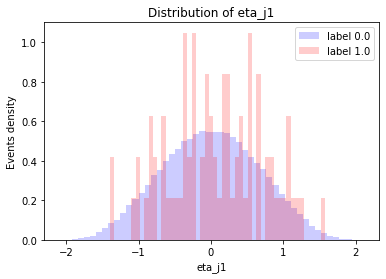

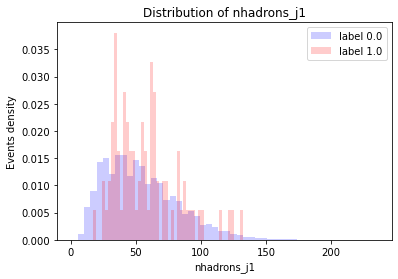

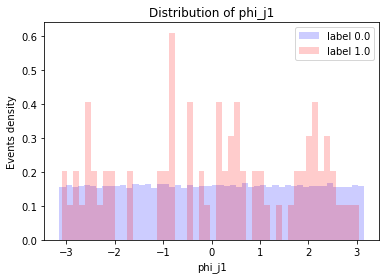

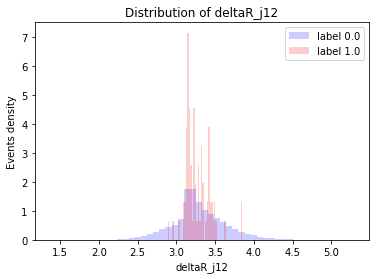

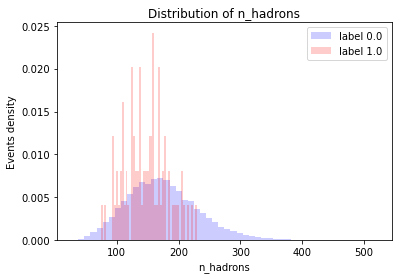

In [5]:
variables = ['pT_j1','E_j2','tau_21_j1', 'eta_j1', 'nhadrons_j1', 'phi_j1', 'deltaR_j12', 'n_hadrons']
for variable in variables:
    bkg_sig_hist(df, variable=variable, label='label')
    plt.show()

En las distribuciones de las variables de masa, los picos coinciden con las masas de las partículas de nueva física para este conjunto.

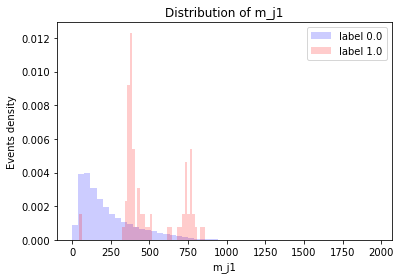

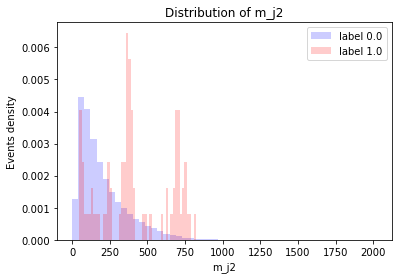

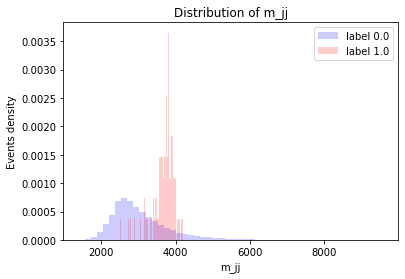

In [6]:
variables = ['m_j1','m_j2','m_jj']
for variable in variables:
    bkg_sig_hist(df, variable=variable, label='label')
    plt.show()

Las correlaciones de los datos de fondo son similares a las del conjunto R&D.

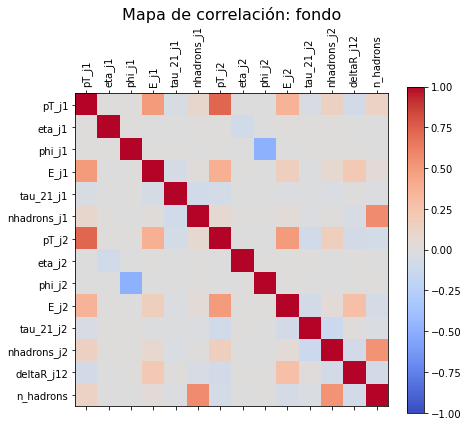

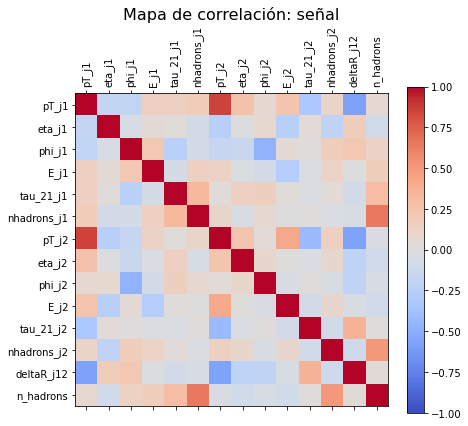

In [7]:
# Queremos tener las correlaciones para la señal y el fondo en dataframes separados
df_bkg = df[df['label']==0].drop(['label','m_jj','m_j1','m_j2'], axis=1)
df_sig = df[df['label']==1].drop(['label','m_jj','m_j1','m_j2'], axis=1)

# Calculamos las correlaciones
df_bkg_corr = df_bkg.corr()
df_sig_corr = df_sig.corr()

# Para graficar el mapa de correlaciones:
for name, corr in [('fondo', df_bkg_corr), ('señal', df_sig_corr)]:
    
    # Definimos figura y tamaño
    fig = plt.figure(figsize=[7,6])
    ax = fig.add_subplot(111)
    
    # Mapa de color
    cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
    fig.colorbar(cax)
    
    #Ejes
    ticks = np.arange(0,len(corr.columns),1)
    ax.set_xticks(ticks)
    plt.xticks(rotation=90)
    ax.set_yticks(ticks)
    ax.set_xticklabels(corr.columns)
    ax.set_yticklabels(corr.columns)
    
    # Título
    plt.title('Mapa de correlación: {}'.format(name), fontsize=16)
    plt.show()

Para la señal, parece haber una correlación de $\tau_{21}\_j2$ y $E\_j2$ con el $p_T$ del jet secundario. Sin embargo, por la poca cantidad de señal, no es evidente en los gráficos.

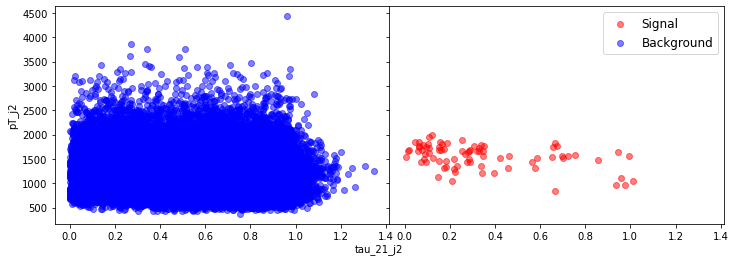

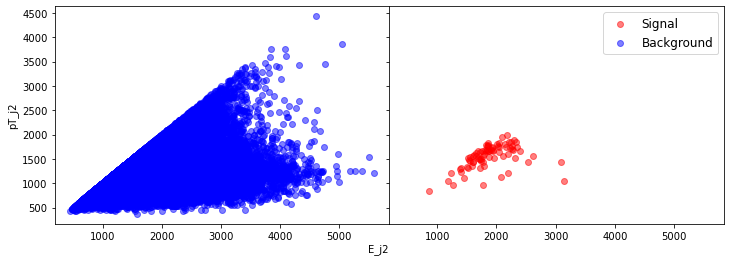

In [8]:
relations = [('tau_21_j2','pT_j2'),('E_j2', 'pT_j2')]
for x,y in relations:
    bkg_sig_scatter(df, x, y)
    plt.show()